In [41]:
#EDA

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [43]:
data = pd.read_csv('data/gemstone.csv')

In [44]:
data.shape

(193573, 11)

In [45]:
data.head(5)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [46]:
data.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [47]:
data.duplicated().sum()

0

In [48]:
data.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [49]:
# Univariant 

In [50]:
# Num vs Num 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [51]:
# Selecting numerical columns
num_column = data.select_dtypes(include=['number'])

# Selecting categorical columns
cat_column = data.select_dtypes(include=['object'])


In [52]:
num_column

,id,carat,depth,table,x,y,z,price
0,0,1.52,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...
193568,193568,0.31,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,62.9,55.0,4.45,4.49,2.81,681


In [53]:
import warnings
warnings.filterwarnings('ignore')

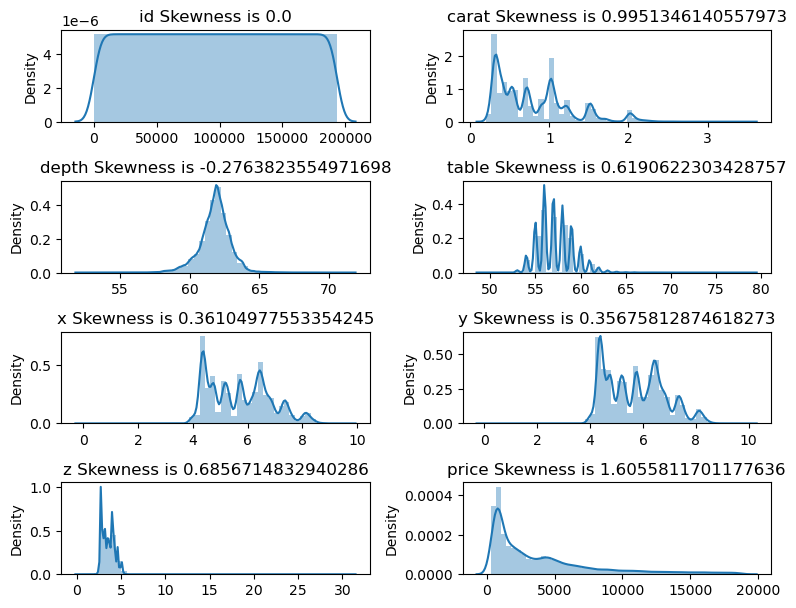

In [54]:
t = 1 
plt.figure(figsize=(8,15))
for col in num_column:
    plt.subplot(10,2, t)
    sns.distplot(x = data[col])
    plt.title(f'{col} Skewness is {data[col].skew()}')
    t += 1
    plt.tight_layout()
plt.show()


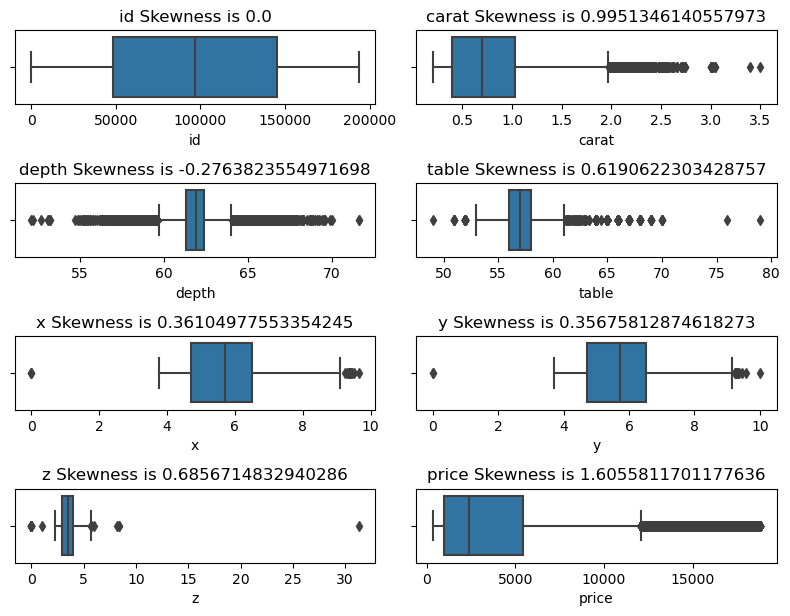

In [55]:
# box-plot

t = 1 
plt.figure(figsize=(8,15))
for col in num_column:
    plt.subplot(10,2, t)
    sns.boxplot(x = data[col])
    plt.title(f'{col} Skewness is {data[col].skew()}')
    t += 1
    plt.tight_layout()
plt.show()


price, carat, depth, table have the major skewness as shown in the boxplot

<!-- Cat vs Cat cols -->
# barplot


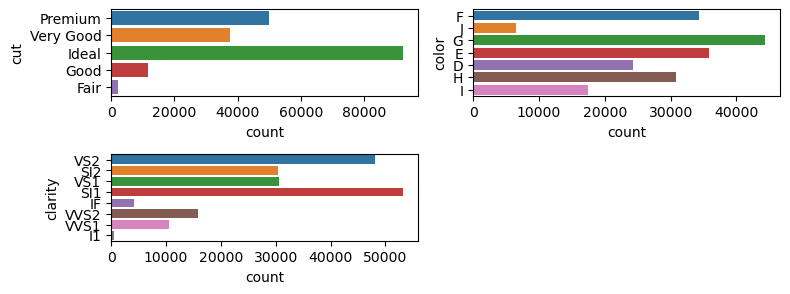

In [68]:
t = 1

plt.figure(figsize=(8,20))
for col in cat_column:
    plt.subplot(14,2,t)
    sns.countplot( y= col, data= data)
    t += 1
    plt.yticks()
    plt.tight_layout()
plt.show()
    

Bivariant Analysis

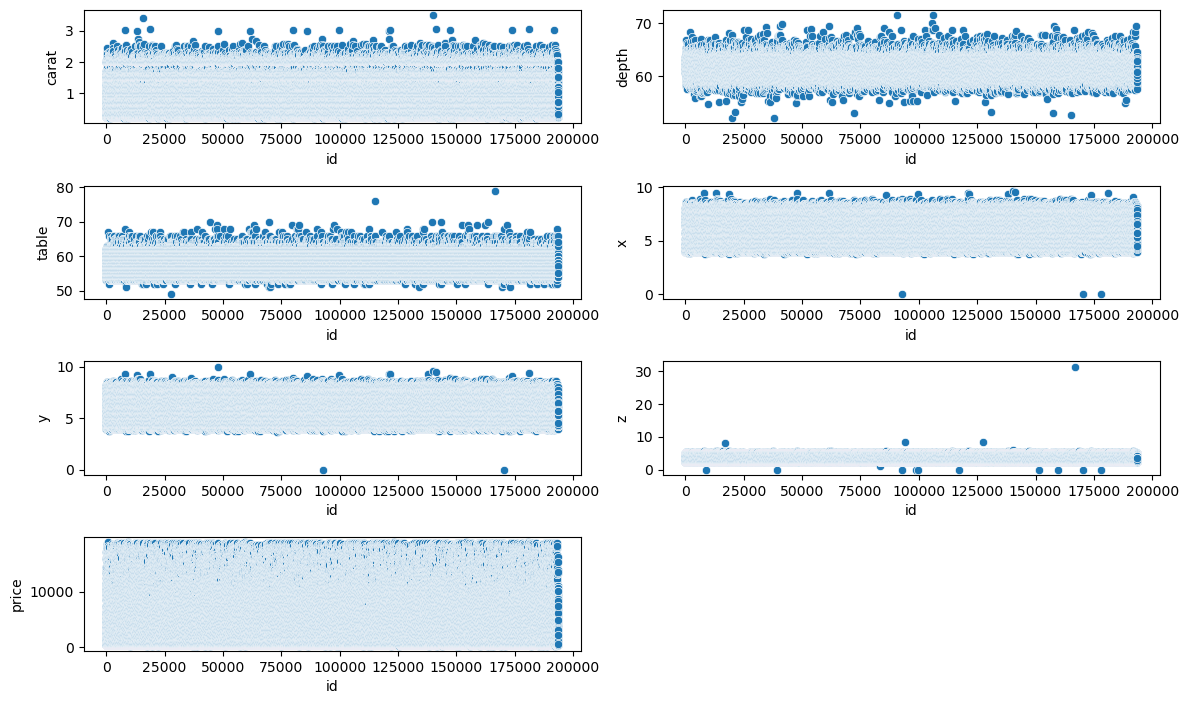

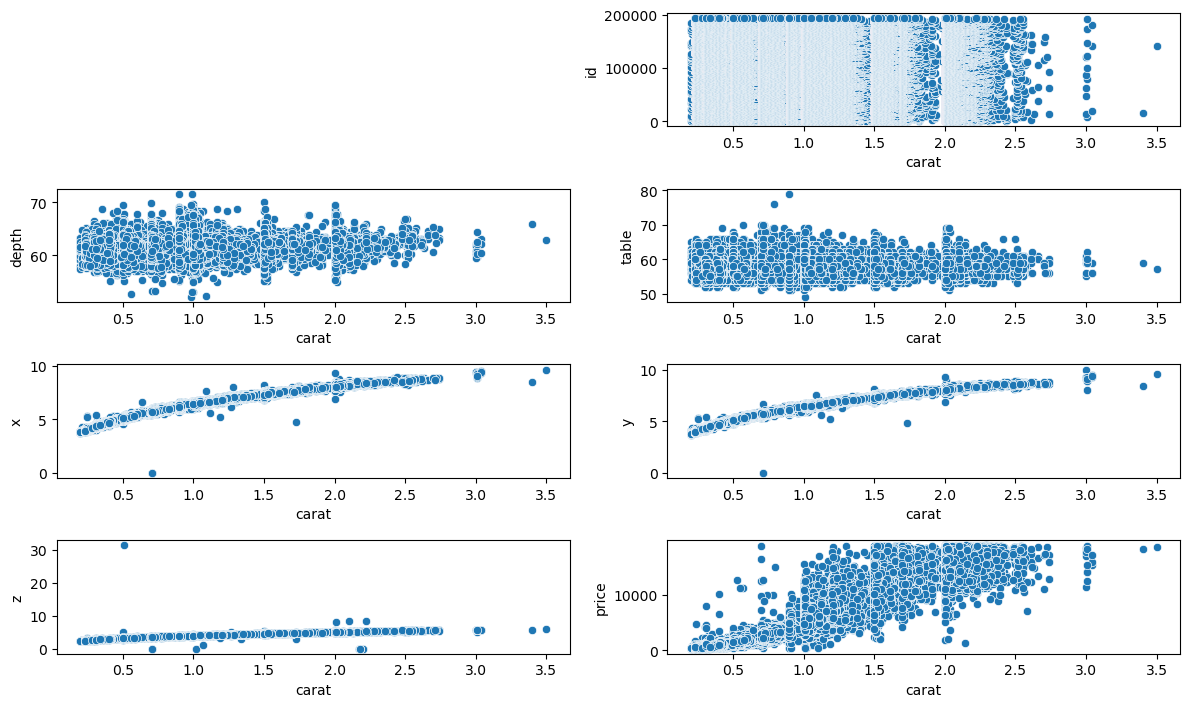

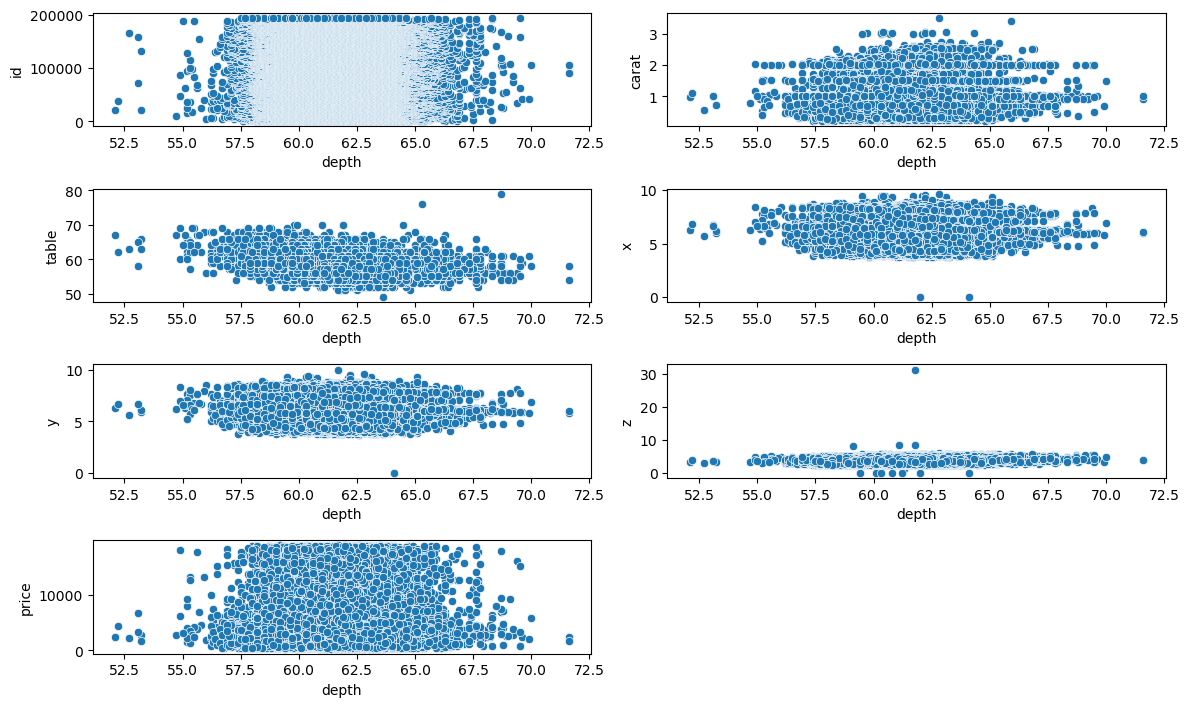

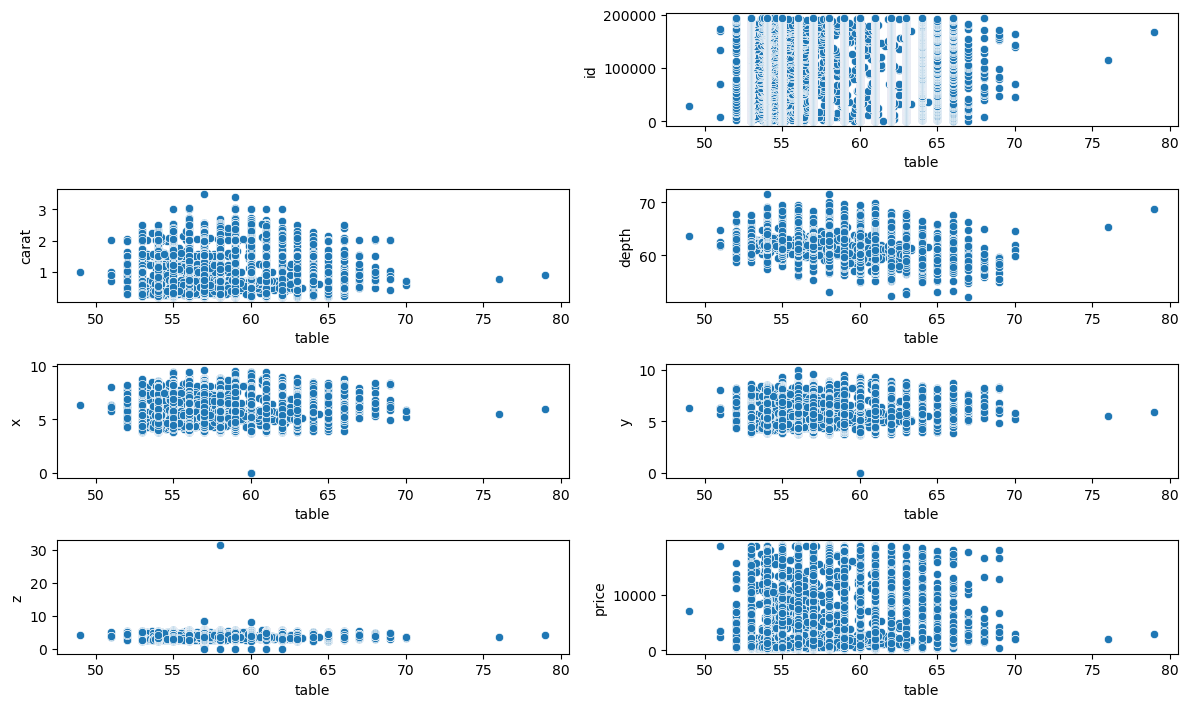

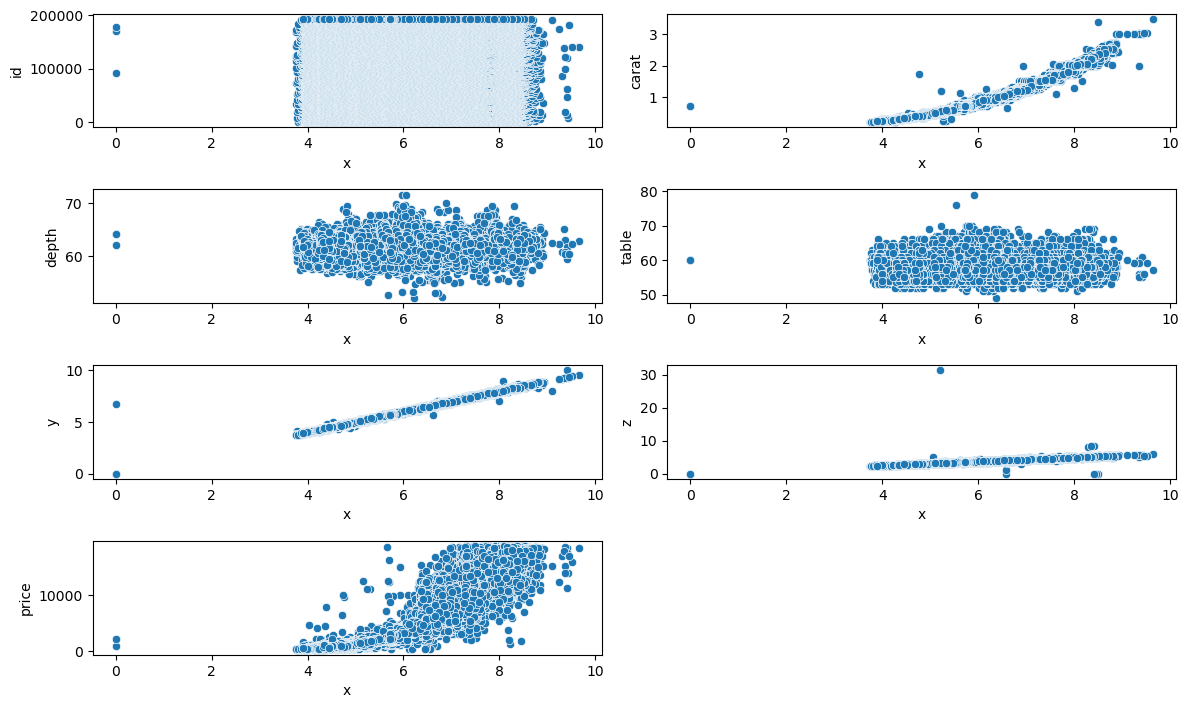

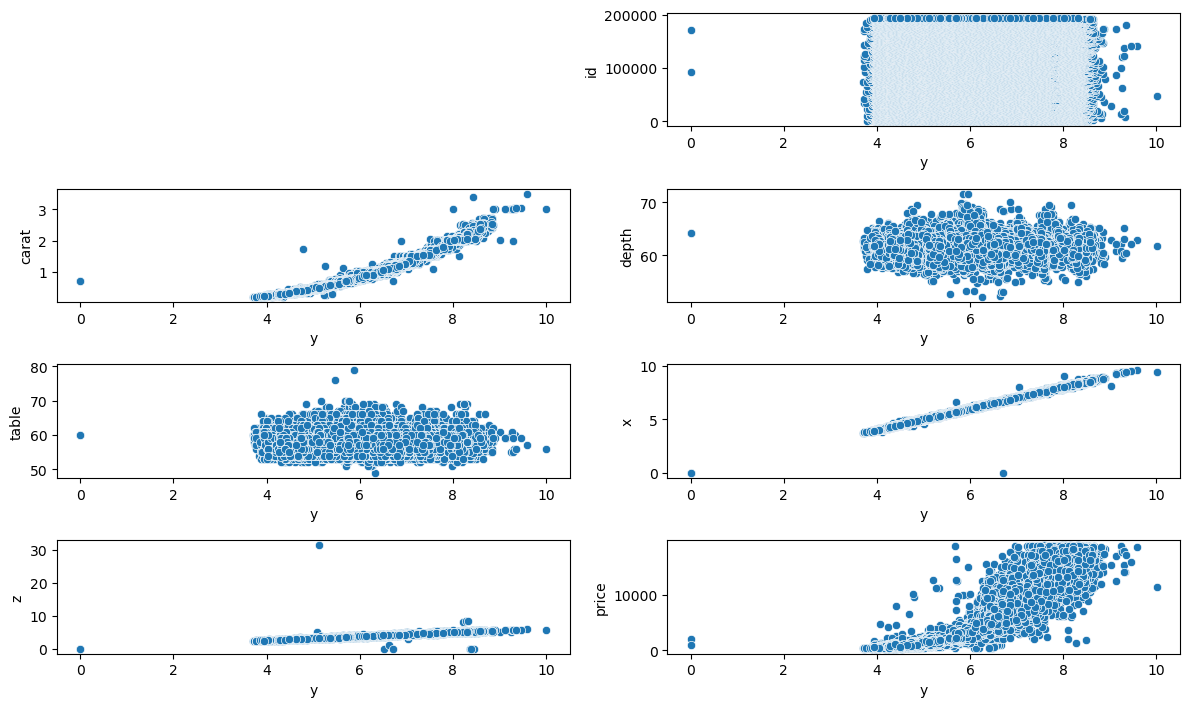

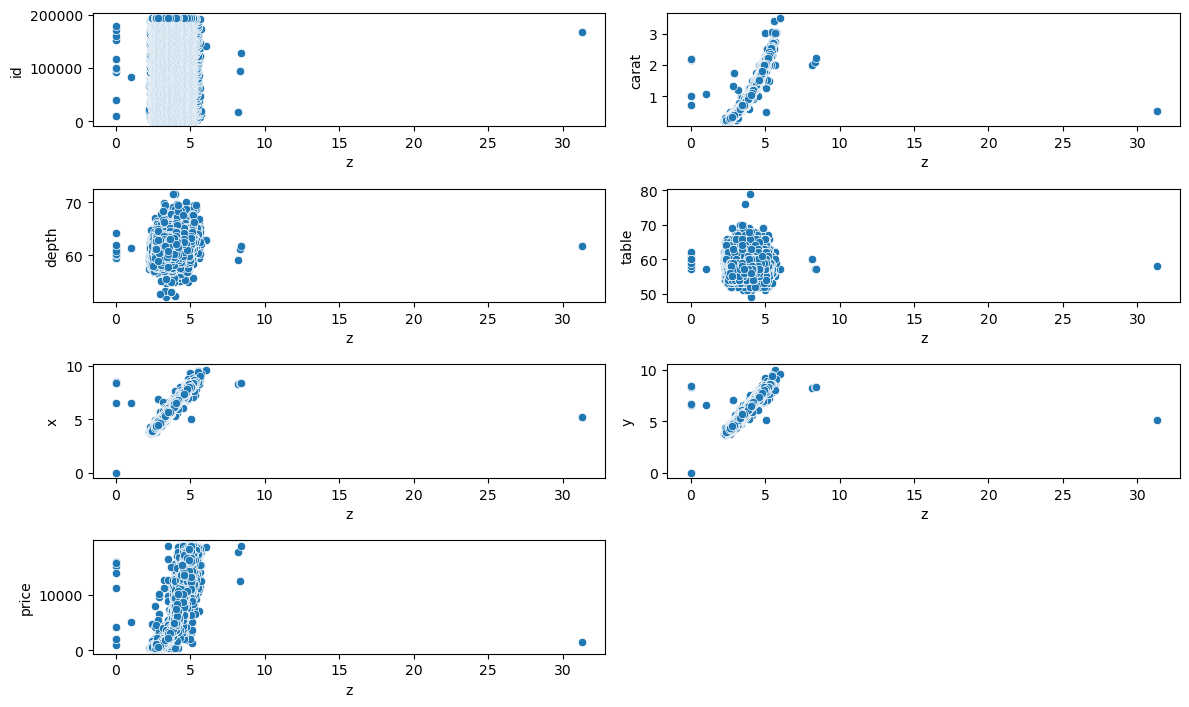

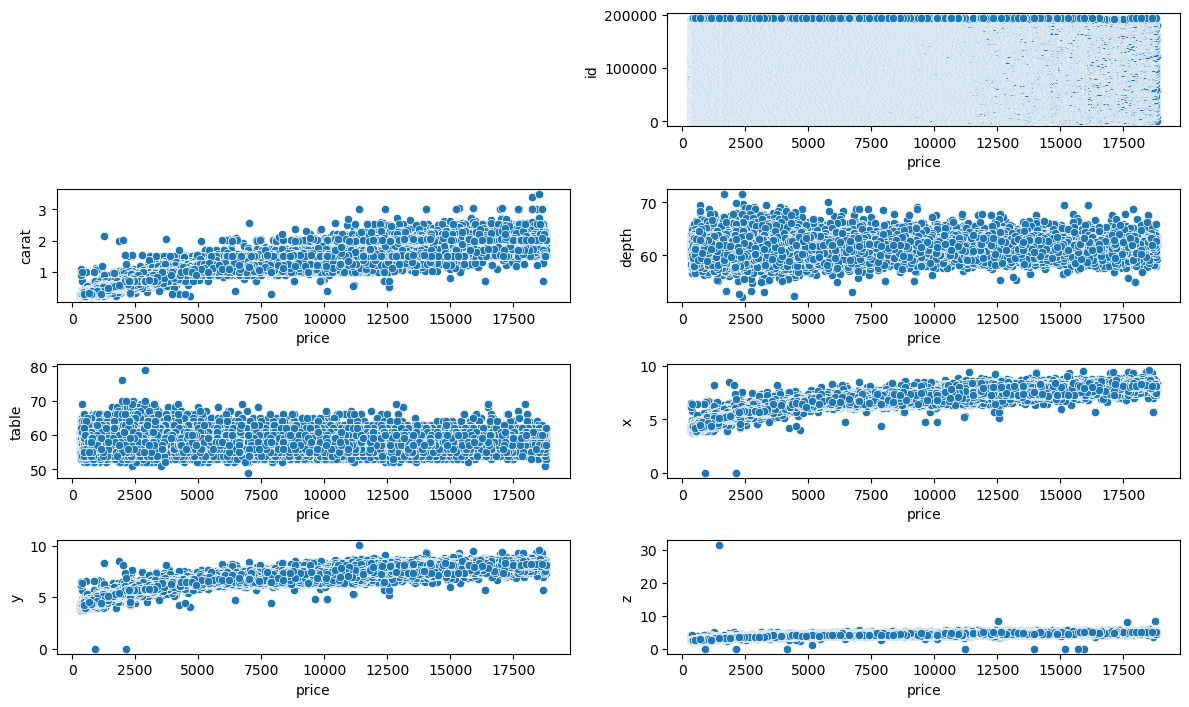

In [72]:
# Num vs Num

t = 1
for col in num_column:
    
    plt.figure(figsize=(12,70))
    
    for c in num_column:
        if col != c :
            plt.subplot(40, 2, t)
            sns.scatterplot( x = col, y= c, data= data)
            plt.xlabel(col)
            plt.ylabel(c)
            
            t += 1
            
    plt.tight_layout()
    plt.show()
            
            

In [73]:
# Num vs Cat


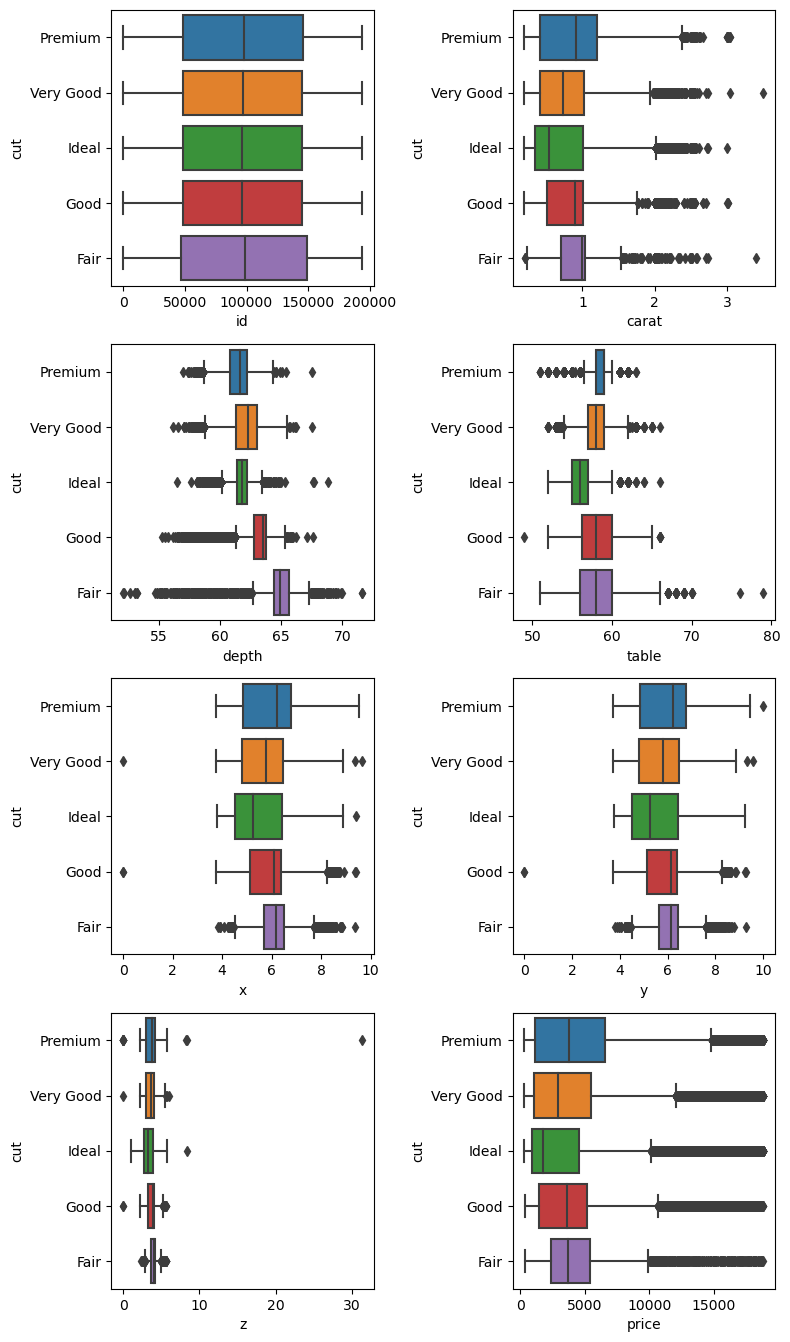

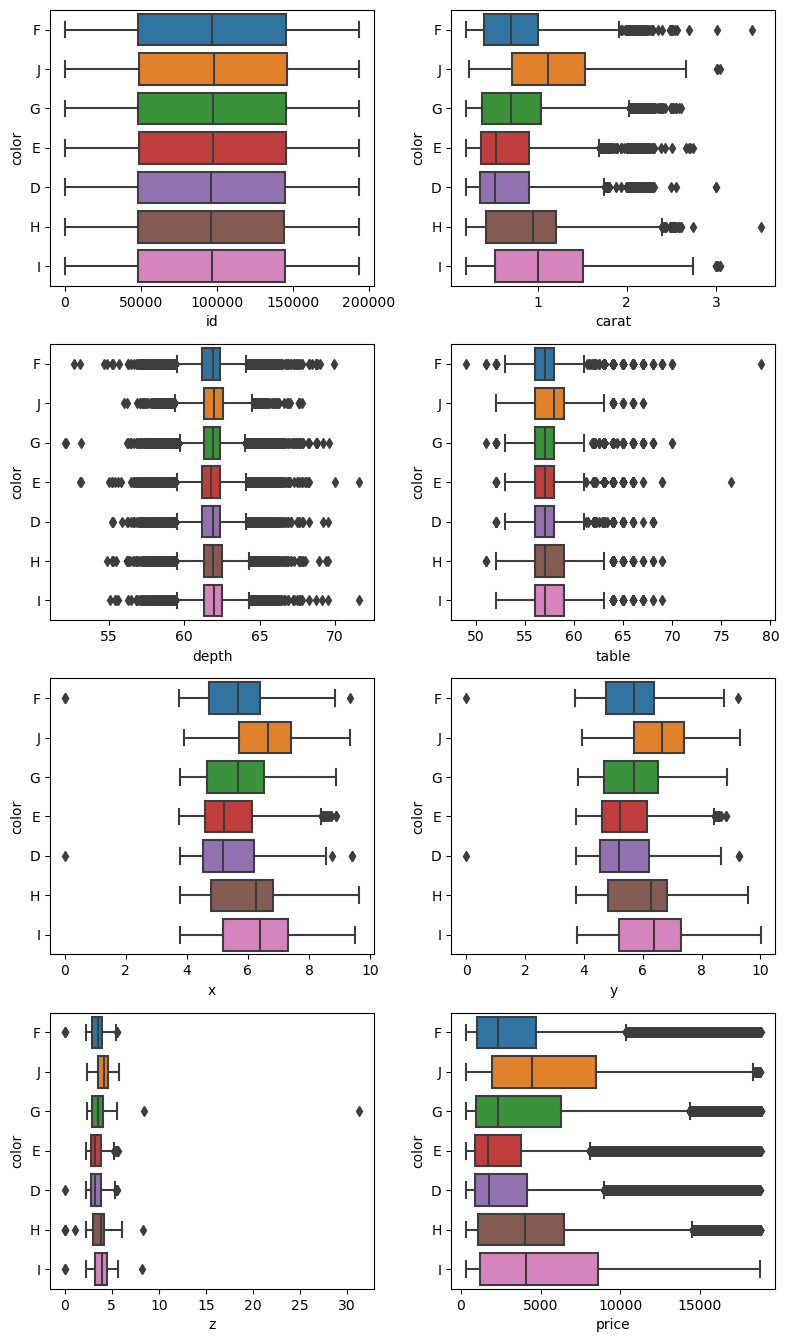

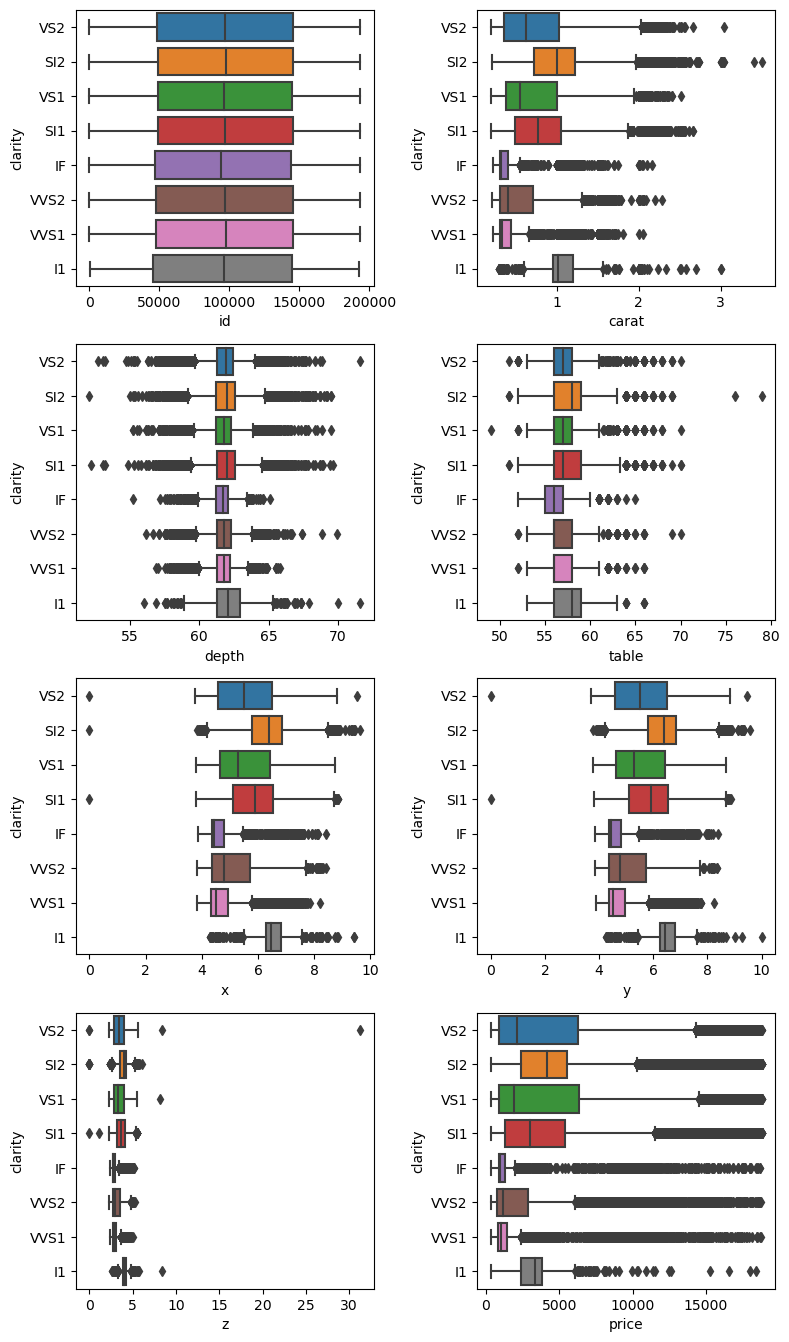

In [74]:
t = 1

for col in cat_column:
    plt.figure(figsize=(8,100))
    for num in num_column:
        
        plt.subplot(30 , 2 , t)
        sns.boxplot(x = num, y = col, data= data)
        
        t += 1
        plt.xlabel(num)
        plt.ylabel(col)
        
    plt.tight_layout()
    plt.show()

### Multivariant Analysis

In [77]:
num_column

,id,carat,depth,table,x,y,z,price
0,0,1.52,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...
193568,193568,0.31,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,62.9,55.0,4.45,4.49,2.81,681


### Multivariant Analysis

In [80]:
cat_column

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [79]:
cat_column.columns

Index(['cut', 'color', 'clarity'], dtype='object')

<Figure size 640x480 with 0 Axes>

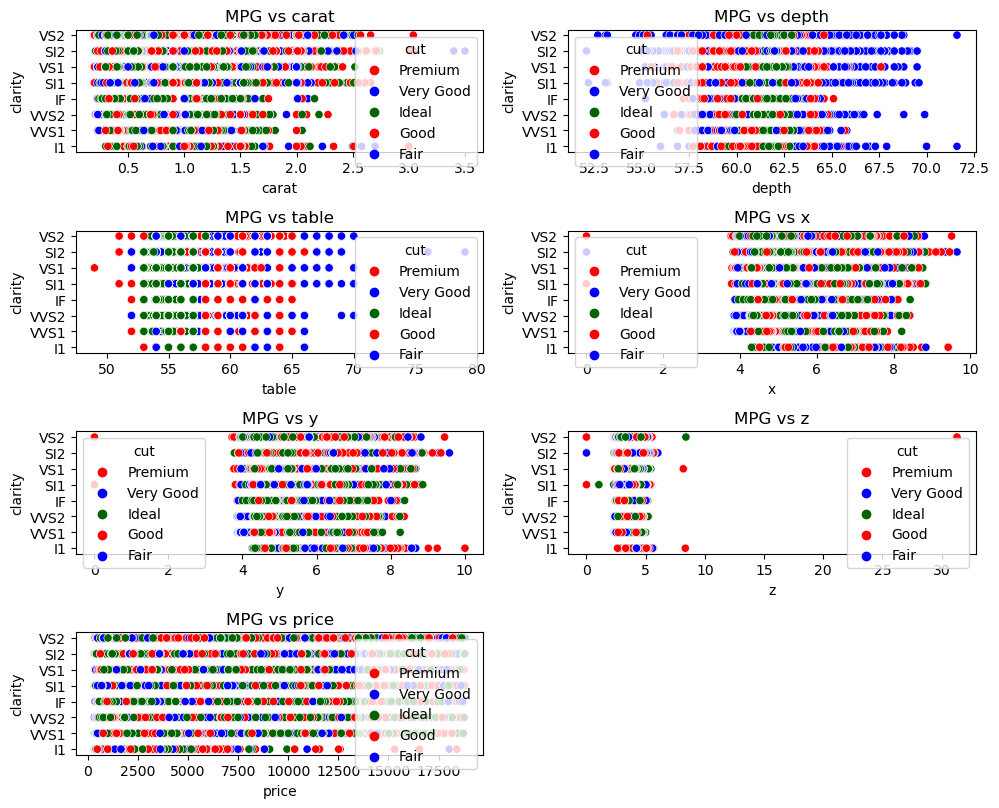

In [86]:
t = 1

plt.suptitle(f'Multivariant Analysis (Num vs Num vs Cat (HUE))', fontsize = 18, weight = 'bold',color = 'red')
plt.figure(figsize=(10, 60))
for i in num_column:
    if i != 'id':
         plt.subplot(30,2, t)
         sns.scatterplot(data = data, x = i, y = 'clarity', hue= data['cut'], palette=['red','blue','darkgreen'])
         
         plt.title(f'MPG vs {i}')
         t += 1
plt.tight_layout()
plt.show()

In [85]:
data.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64